In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir = 'D:\\Hackathon_project\\Dataset'
testing = 'D:\\Hackathon_project\\image'

In [3]:
batch_size = 32
img_height = 180
img_width = 180

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory = data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1557 files belonging to 2 classes.
Using 1246 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  directory = data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1557 files belonging to 2 classes.
Using 311 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)


['defected', 'no_defected']


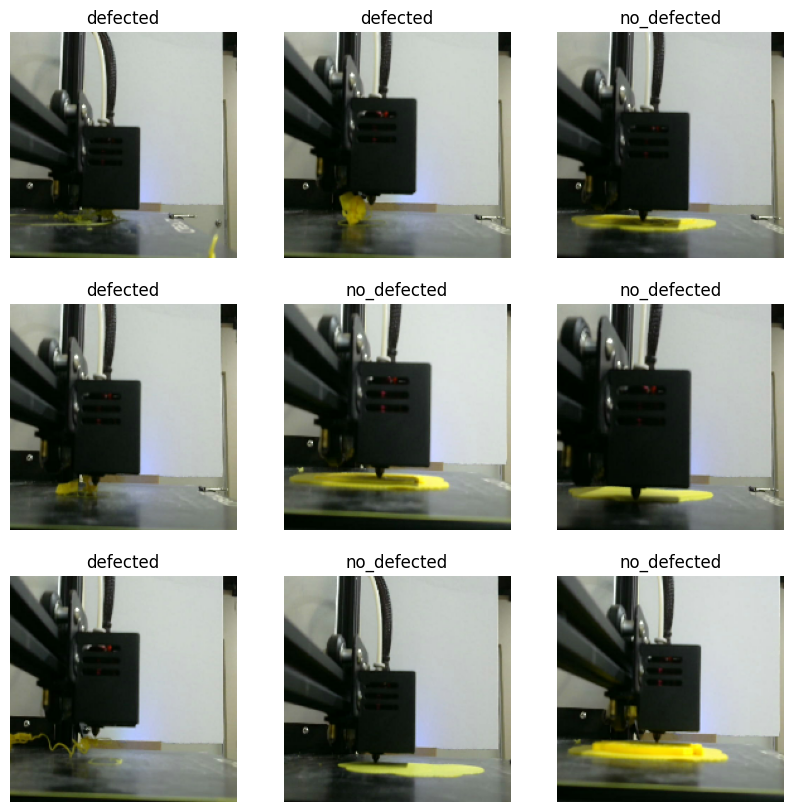

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
normalization_layer = layers.Rescaling(1./255)

In [11]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [12]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


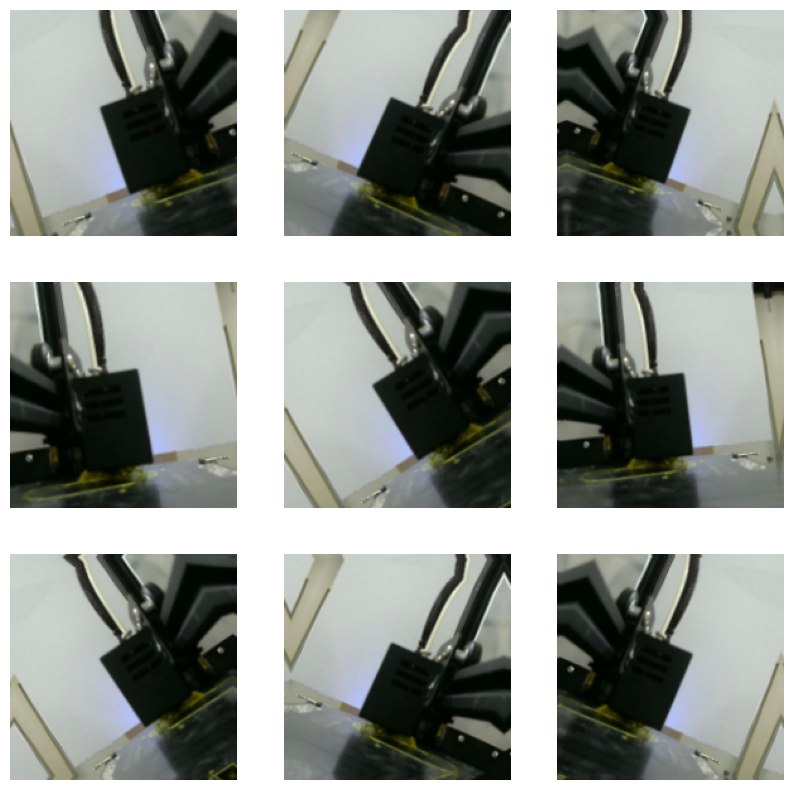

In [13]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [14]:
num_classes = len(class_names)
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.5687 - loss: 0.7045 - val_accuracy: 0.8489 - val_loss: 0.3868
Epoch 2/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.7809 - loss: 0.4454 - val_accuracy: 0.8392 - val_loss: 0.3284
Epoch 3/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.8731 - loss: 0.3160 - val_accuracy: 0.8971 - val_loss: 0.2925
Epoch 4/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.8695 - loss: 0.2963 - val_accuracy: 0.8907 - val_loss: 0.2275
Epoch 5/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.8939 - loss: 0.2432 - val_accuracy: 0.9293 - val_loss: 0.1763
Epoch 6/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9165 - loss: 0.2015 - val_accuracy: 0.9678 - val_loss: 0.1361
Epoch 7/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9308 - loss: 0.1765 - val_accuracy: 0.9518 - val_loss: 0.1075
Epoch 8/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9452 - loss: 0.1418 - val_accuracy: 0.9293 - v

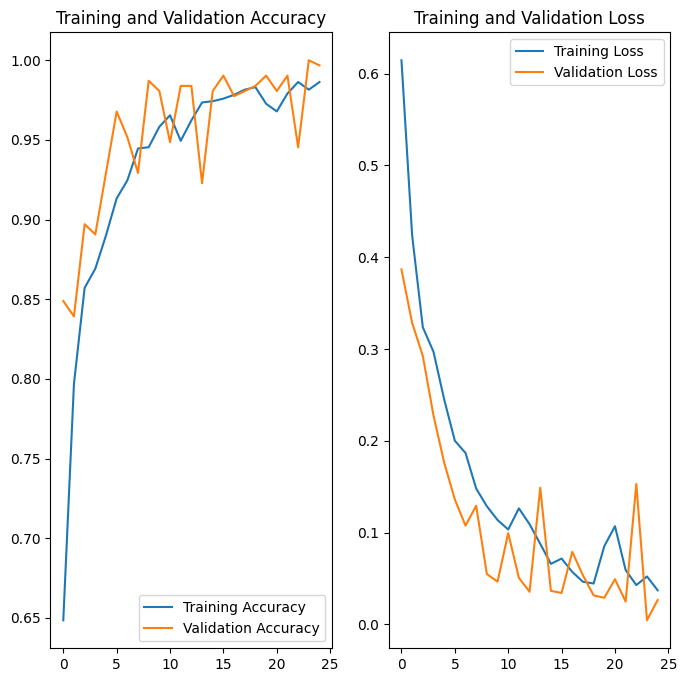

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
from tensorflow.keras.models import save_model

model.save('D:\\Hackathon_project\\backend\\model.keras')  


from tensorflow.keras.models import load_model


model = load_model('D:\\Hackathon_project\\backend\\model.keras')

In [20]:
print(type(model))


<class 'keras.src.models.sequential.Sequential'>


In [23]:

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=testing,  
    image_size=(img_height, img_width),
    batch_size=batch_size,  
    shuffle=False  
)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
l = []
for images, labels in test_ds:
    predictions = model.predict(images)

    predicted_classes = np.argmax(predictions, axis=1)
    for x in predicted_classes:
        if x == 0:
            l.append('defected')
        else:
            l.append('non--defected')
    print("Predicted class indices:", l)
    print("Predicted probabilities:", predictions)
    print(images.shape)
    print(labels.shape)

Found 14 files belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class indices: ['defected', 'defected', 'defected', 'defected', 'defected', 'non--defected', 'non--defected', 'non--defected', 'non--defected', 'non--defected', 'non--defected', 'non--defected', 'non--defected', 'non--defected']
Predicted probabilities: [[  4.4229326  -5.7169027]
 [  4.569286   -5.995225 ]
 [  3.6805272  -4.455335 ]
 [  5.6129746  -6.844451 ]
 [  5.337722   -6.5411315]
 [-12.30718    12.817281 ]
 [ -9.89975     8.87279  ]
 [ -9.804948    8.716523 ]
 [-12.888311   13.856796 ]
 [-13.281908   14.544328 ]
 [ -3.2859893   3.52139  ]
 [-17.641045   17.001503 ]
 [-13.869371   13.011531 ]
 [-13.321938   15.230341 ]]
(14, 180, 180, 3)
(14,)
